# SpurHacks 2025 - Qiskit Workshop: Introduction

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_gate_map

from qiskit_ibm_runtime import QiskitRuntimeService

## Setting up Qiskit Runtime

In [ ]:
QiskitRuntimeService.save_account(channel="ibm_cloud",
                                  instance="MY_CRN"
                                  token="MY_IBM_QUANTUM_TOKEN",
                                  name="UNIQUE_NAME",
                                  set_as_default=True,
                                  overwrite=True,)

In [2]:
# service = QiskitRuntimeService(name="UNIQUE_NAME")

# OR, us the default

service = QiskitRuntimeService()

# Building quantum circuits

Goal: Create the $\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$ entangled state

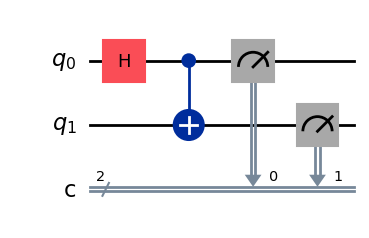

In [3]:
# Create Bell state circuit
bell_circ = QuantumCircuit(2,2)
bell_circ.h(0)
bell_circ.cx(0, 1)
bell_circ.measure([0,1], [0,1])
bell_circ.draw()

In [7]:
from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()

pub = (bell_circ)
job = sampler.run([pub])
result = job.result()
print(result)

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


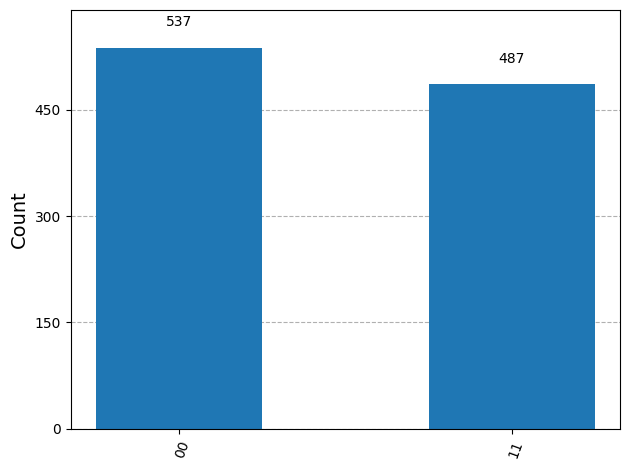

In [8]:
counts = result[0].data.c.get_counts()
plot_histogram(counts)

# Running on a real quantum computer

In [9]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_torino')>]

In [10]:
# Select the backend you want
backend = service.backend('ibm_brisbane')

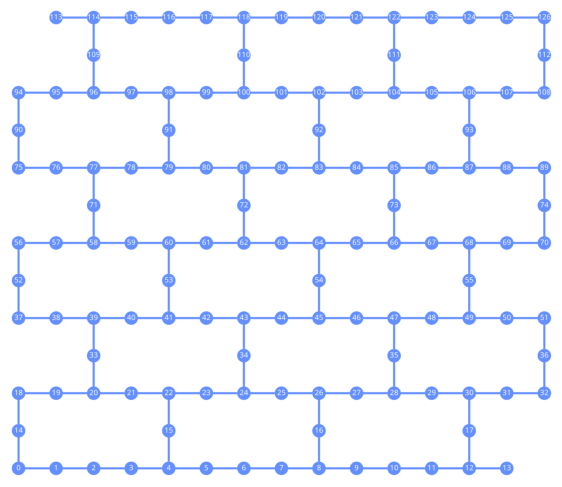

In [11]:
plot_gate_map(backend, figsize=(7, 7), font_size=14)

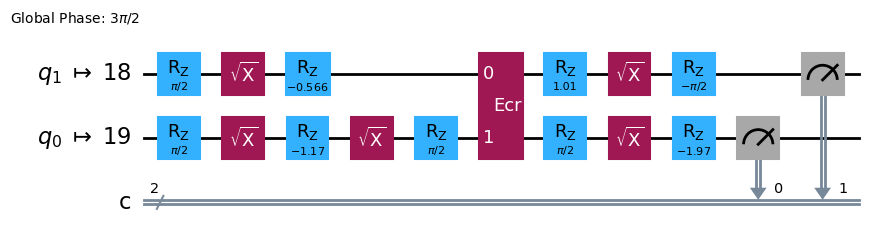

In [12]:
# Transpile the circuit before running on the real quantum hardware

bell_circ_t = transpile(bell_circ, backend, optimization_level=2)
bell_circ_t.draw(idle_wires=False)

In [13]:
# Run the circuit
from qiskit_ibm_runtime import Sampler

sampler = Sampler(mode=backend)
pub = (bell_circ_t)
job_ibmq = sampler.run([pub], shots=1024)
job_ibmq.job_id()

'd1am8jk7tq0c73dbna30'

In [14]:
# Get job status
print(job_ibmq.status())

DONE


In [15]:
# Plot histogram of results. Note the noise in the system
# results in states that should not appear in the measurements.
result = job_ibmq.result()
print(result)

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-06-20 13:38:23', stop='2025-06-20 13:38:24', size=1024>)])}, 'version': 2})


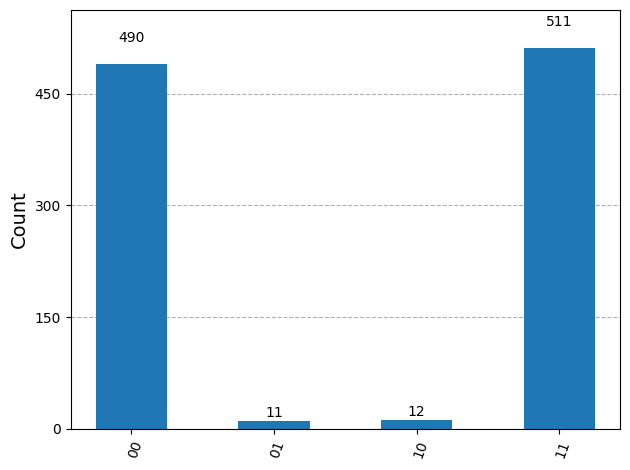

In [16]:
counts = result[0].data.c.get_counts()
plot_histogram(counts)

## Verifying circuits with local testing mode

In [17]:
from qiskit_ibm_runtime.fake_provider import FakeQuebec

fake_quebec_backend = FakeQuebec()

In [18]:
bell_circ_t_fake = transpile(bell_circ, fake_quebec_backend)

sampler = Sampler(mode=fake_quebec_backend)
pub = (bell_circ_t_fake)
job_fake = sampler.run([pub])

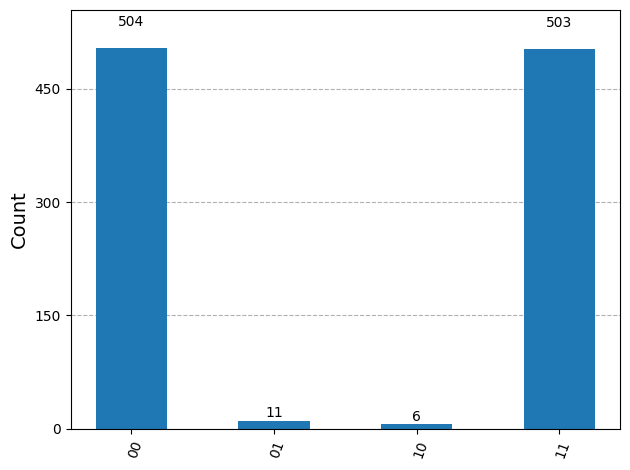

In [19]:
result = job_fake.result()
counts = result[0].data.c.get_counts()
plot_histogram(counts)

In [20]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version

print("Qiskit version:", qiskit_version)
print("Qiskit Runtime version:", runtime_version)

Qiskit version: 2.0.2
Qiskit Runtime version: 0.40.1
